In [18]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_price = pd.read_csv(
    r'C:\Users\Leo Hubmann\Desktop\thesis\data\price_data\bitcoin_2021_2024.csv',
    parse_dates=['date'],
    low_memory=False
)
df_price.set_index('date', inplace=True)

btc = df_price.loc['2021-01-01':'2024-12-31'].copy()
daily_ret = np.log(btc['close']).diff().dropna()

# --- Load sentiment JSON ---
with open(r'C:\Users\Leo Hubmann\Desktop\thesis\data\newsEODHD_data\data_newEODHD.json', encoding='utf-8') as f:
    data = json.load(f)

df_sent = pd.DataFrame(data['BTC-USD.CC'])
df_sent['date'] = pd.to_datetime(df_sent['date'])
df_sent.set_index('date', inplace=True)
df_sent.sort_index(inplace=True)

# --- Merge daily data ---
merged = pd.DataFrame({
    'return': daily_ret,
    'sentiment': df_sent['normalized']
}).dropna()

# --- Resample to weekly ---
weekly = pd.DataFrame({
    'ret_w'  : merged['return'].resample('W-MON').sum(),      # weekly log return
    'sent_w' : merged['sentiment'].resample('W-MON').mean()   # weekly avg sentiment
}).dropna()

weekly['d_sent'] = weekly['sent_w'].diff()                   # Δ sentiment week-over-week


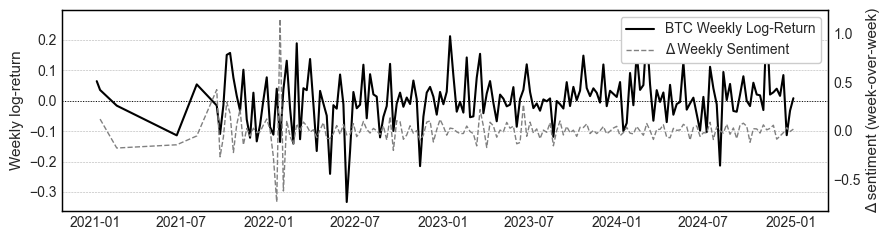

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax_ret = plt.subplots(figsize=(9, 2.5))
ax_sent = ax_ret.twinx()

# BTC returns
ax_ret.plot(weekly.index, weekly['ret_w'],
            color='black', label='BTC Weekly Log-Return')

# Δ sentiment
ax_sent.plot(weekly.index, weekly['d_sent'],
             color='gray', linestyle='--', linewidth=1.0, label='Δ Weekly Sentiment')

# Axis labels
ax_ret.set_ylabel('Weekly log-return', fontsize=11)
ax_sent.set_ylabel('Δ sentiment (week-over-week)', fontsize=11)

# Reference line
ax_ret.axhline(0, color='black', linewidth=.7, linestyle=':')

# Grid & styling
ax_sent.spines['top'].set_color('black')
ax_sent.spines['right'].set_color('black')
ax_sent.spines['left'].set_color('black')
ax_sent.spines['bottom'].set_color('black')
ax_sent.grid(False)
ax_ret.grid(True, axis="y", ls="--", lw=0.4, color="grey", alpha=0.6)
ax_ret.grid(False, which='major', axis='x')

# Legend
lines1, labs1 = ax_ret.get_legend_handles_labels()
lines2, labs2 = ax_sent.get_legend_handles_labels()
ax_ret.legend(lines1 + lines2, labs1 + labs2, loc='upper right', frameon=True, framealpha=1)

plt.tight_layout()
# plt.savefig("btc_weekly_vs_sentiment.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
display(df.head())

,count,normalized
date,,
2021-01-02,1,0.000
2021-01-04,1,0.527
2021-01-08,1,0.382
2021-02-15,1,0.202
2021-06-16,1,0.361


In [12]:
display(df.tail())

,count,normalized
date,,
2024-12-26,8,0.0768
2024-12-27,6,0.1068
2024-12-29,6,0.1880
2024-12-30,10,0.1182
2024-12-31,13,0.1328
